In [16]:
from six.moves import cPickle as pickle
from sklearn.linear_model import LogisticRegression

%matplotlib inline
from IPython.display import display, Image
from matplotlib import pyplot as plt



In [17]:
# Class encapculating the code for plot
class plot():
    def __init__(self, rows, columns, flag_size = (15,5)):
        self.fig, self.axs = plt.subplots(rows,columns, figsize=flag_size, facecolor='w', edgecolor='k')
        self.axs = self.axs.ravel()
        
    def plot_images(self, plot_no, img, label=None): 
        self.axs[plot_no].imshow(img)
        if label:
            self.axs[plot_no].set_title(label)

    def disp_plots(self, img_dataset, img_labels):  # Give the function the complete dataset (or the sampled)
        for i, image in enumerate(img_dataset):
            self.plot_images(i, image, img_labels[i])

In [18]:
# Implementing Logitic Regression on out training Set:

# Let us first load the data we stored in the previous step as we dont want to always run the above code always
cleaned_dataset_path = '/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/Udacity/DataPreparation/dataset_cleaned.p'

with open(cleaned_dataset_path, 'rb') as f:
    fnl_dataset = pickle.load(f)
    training_dataset = (fnl_dataset['training_dataset'])
    training_labels = (fnl_dataset['training_labels'])
    test_dataset = (fnl_dataset['test_dataset'])
    test_labels = (fnl_dataset['test_labels'])
    crossvalid_dataset = (fnl_dataset['crossvalid_dataset'])
    crossvalid_labels = (fnl_dataset['crossvalid_labels'])
    
actual_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}
    
# Fit the Logistic regression model to the training set.
classifier = LogisticRegression()
x_test = test_dataset.reshape(len(test_dataset), 784)
y_test_labels = test_labels

(1000, 784) (1000,) (7709, 784) (7709,)
CPU times: user 2.05 s, sys: 9.78 ms, total: 2.06 s
Wall time: 2.07 s
Accuracy score with training 1000 dataset is : 0.797639123103
(7709,) (7709,)


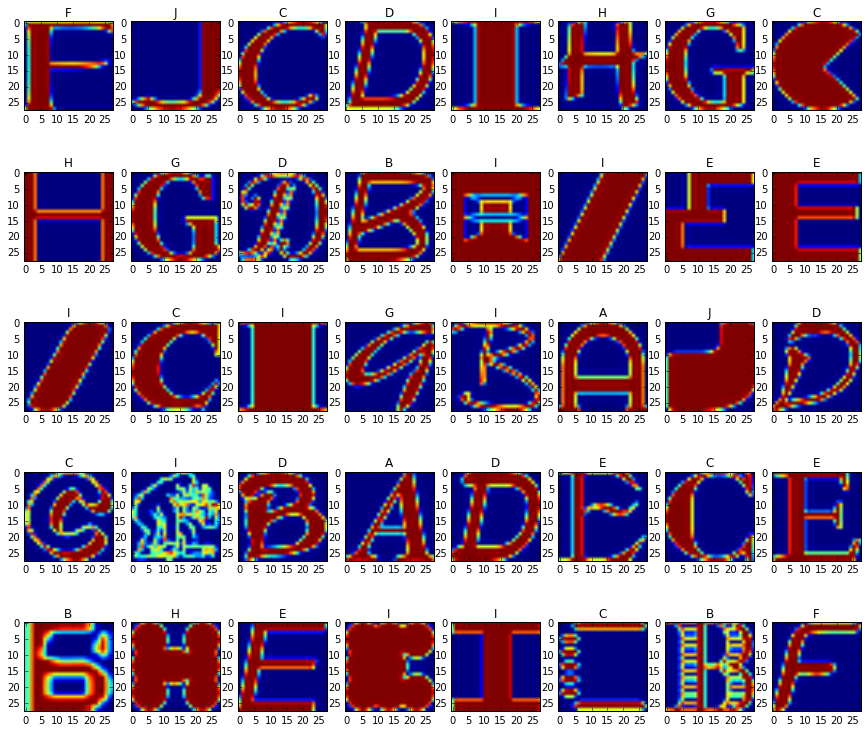

In [19]:
# logistic regression or any classifier takes input where each row is one instance and each column is one attribute.
# In the perspective of image recognition. One row would be a image and its columns will be the pixel values of each cell.
# In this example, we take a sample size of 1000 images where each row will have 784 columns (28*28) pixels.
sample_size = 1000
x_train = training_dataset[:sample_size].reshape(sample_size, 784)
y_train_labels = training_labels[:sample_size]
print (x_train.shape, y_train_labels.shape, x_test.shape, y_test_labels.shape)

%time classifier.fit(x_train, y_train_labels)
Y_predict = classifier.predict(x_test)
print ('Accuracy score with training %d dataset is :'%sample_size, classifier.score(x_test, y_test_labels))

print (y_test_labels.shape, Y_predict.shape)

# Plot the first 40 classified images 
plot(rows=5, columns=8, flag_size = (15,13)).disp_plots(test_dataset[:40], [actual_labels[al] for al in Y_predict[:40]])

(10000, 784) (10000,) (7709, 784) (7709,)
CPU times: user 46.9 s, sys: 179 ms, total: 47.1 s
Wall time: 47.2 s
Accuracy score with training 10000 dataset is : 0.840575950188
(7709,) (7709,)


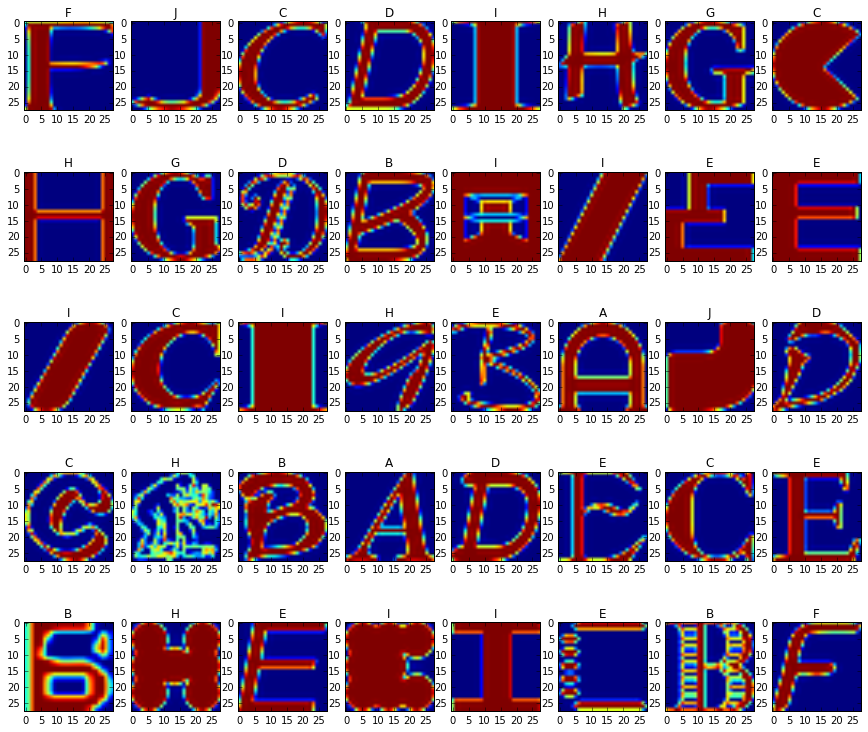

In [20]:
# logistic regression or any classifier takes input where each row is one instance and each column is one attribute.
# In the perspective of image recognition. One row would be a image and its columns will be the pixel values of each cell.
# In this example, we take a sample size of 1000 images where each row will have 784 columns (28*28) pixels.
sample_size = 10000
x_train = training_dataset[:sample_size].reshape(sample_size, 784)
y_train_labels = training_labels[:sample_size]
print (x_train.shape, y_train_labels.shape, x_test.shape, y_test_labels.shape)


%time classifier.fit(x_train, y_train_labels)
Y_predict = classifier.predict(x_test)
print ('Accuracy score with training %d dataset is :'%sample_size, classifier.score(x_test, y_test_labels))

print (y_test_labels.shape, Y_predict.shape)

# Plot the first 40 classified images 
plot(rows=5, columns=8, flag_size = (15,13)).disp_plots(test_dataset[:40], [actual_labels[al] for al in Y_predict[:40]])